# 1. Data Extraction  

**These data are publicly downloadable at http://www.fao.org/statistics/databases/en/, and there are no API service available at this website. Only download link are provided, so I download it into my laptop.**

**Data description: One table contains top10 commodities of Afghanistan in a certain year. Here are total ten tables representing 10 years since 2009**

In [59]:
import pandas as pd
import numpy as np
import os

print(os.getcwd())
df = pd.read_csv('./FAOSTAT_data_10-26-2018.csv')
df




/Users/anthony/Desktop/Master/NEU/ALY6140/Week5/Data Table


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Ranking
0,QC,Crops,2,Afghanistan,5510,Production,15,Wheat,2018,2018,tonnes,3613300.0,1
1,QL,Livestock Primary,2,Afghanistan,5510,Production,882,"Milk, whole fresh cow",2018,2018,tonnes,1796609.0,2
2,QC,Crops,2,Afghanistan,5510,Production,560,Grapes,2018,2018,tonnes,984081.0,3
3,QC,Crops,2,Afghanistan,5510,Production,116,Potatoes,2018,2018,tonnes,615684.0,4
4,QC,Crops,2,Afghanistan,5510,Production,463,"Vegetables, fresh nes",2018,2018,tonnes,591350.0,5
5,QC,Crops,2,Afghanistan,5510,Production,567,Watermelons,2018,2018,tonnes,381238.0,6
6,QC,Crops,2,Afghanistan,5510,Production,27,"Rice, paddy",2018,2018,tonnes,352177.0,7
7,QC,Crops,2,Afghanistan,5510,Production,568,"Melons, other (inc.cantaloupes)",2018,2018,tonnes,329241.0,8
8,QC,Crops,2,Afghanistan,5510,Production,30,"Rice, paddy (rice milled equivalent)",2018,2018,tonnes,234902.0,9
9,QC,Crops,2,Afghanistan,5510,Production,515,Apples,2018,2018,tonnes,217192.0,10


# 2. Data cleanup
**Dropping out some columns which I don't use, I will use two operations on the DataFrame in following processing**

In [43]:
df = df.drop(['Domain Code','Area Code','Element Code','Item Code','Year Code'], axis = 1)

**Removing missing values than may contain**

In [46]:
df = df.dropna()
df

,Domain,Area,Element,Item,Year,Unit,Value,Ranking
0,Crops,Afghanistan,Production,Wheat,2018,tonnes,3613300.0,1
1,Livestock Primary,Afghanistan,Production,"Milk, whole fresh cow",2018,tonnes,1796609.0,2
2,Crops,Afghanistan,Production,Grapes,2018,tonnes,984081.0,3
3,Crops,Afghanistan,Production,Potatoes,2018,tonnes,615684.0,4
4,Crops,Afghanistan,Production,"Vegetables, fresh nes",2018,tonnes,591350.0,5
5,Crops,Afghanistan,Production,Watermelons,2018,tonnes,381238.0,6
6,Crops,Afghanistan,Production,"Rice, paddy",2018,tonnes,352177.0,7
7,Crops,Afghanistan,Production,"Melons, other (inc.cantaloupes)",2018,tonnes,329241.0,8
8,Crops,Afghanistan,Production,"Rice, paddy (rice milled equivalent)",2018,tonnes,234902.0,9
9,Crops,Afghanistan,Production,Apples,2018,tonnes,217192.0,10


**Concatong all 10 tables to get a summary table**

In [77]:
#os.chdir('./Data Table')

result = pd.DataFrame() # I will concat all 10 tables together, result will be the final dataFrame
for name in os.listdir():
    df = pd.read_csv(name)
    df = df.drop(['Domain Code','Area Code','Element Code','Item Code','Year Code'], axis = 1)
    df = df.dropna()
#    df = df.groupby('Year').sum().reset_index()
    result = pd.concat([result, df])
result

,Domain,Area,Element,Item,Year,Unit,Value,Ranking
0,Crops,Afghanistan,Production,Wheat,2015,tonnes,4673040.0,1
1,Livestock Primary,Afghanistan,Production,"Milk, whole fresh cow",2015,tonnes,1868311.0,2
2,Crops,Afghanistan,Production,Grapes,2015,tonnes,805072.0,3
3,Crops,Afghanistan,Production,"Vegetables, fresh nes",2015,tonnes,797775.0,4
4,Crops,Afghanistan,Production,"Rice, paddy",2015,tonnes,410000.0,5
...,...,...,...,...,...,...,...,...
5,Crops,Afghanistan,Production,Watermelons,2018,tonnes,381238.0,6
6,Crops,Afghanistan,Production,"Rice, paddy",2018,tonnes,352177.0,7
7,Crops,Afghanistan,Production,"Melons, other (inc.cantaloupes)",2018,tonnes,329241.0,8
8,Crops,Afghanistan,Production,"Rice, paddy (rice milled equivalent)",2018,tonnes,234902.0,9


# Data Visualization

**How does the total food production change over time?**

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns



In [73]:
#sort_df = result.sort_values('Year')
groupByYear = result.groupby('Year').sum()
groupByYear = groupByYear.sort_values('Year').reset_index()
groupByYear

,Year,Value,Ranking
0,2009,10403037.0,55
1,2010,9742798.0,55
2,2011,8308038.0,55
3,2012,10183047.0,55
4,2013,10396998.0,55
5,2014,11023934.0,55
6,2015,10230958.0,55
7,2016,11340998.0,55
8,2017,9904790.0,55
9,2018,9115774.0,55


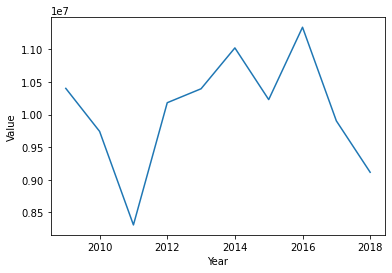

In [74]:
sns.lineplot(x='Year', y ='Value', data = groupByYear)
plt.show()

**We can see huge fluctuations in wheat production**

**How does wheat production compare to other foods production?**

In [132]:
WheatProduction = result.loc[result['Item'] =='Wheat',['Year','Value' ] ]
WheatProduction

,Year,Value
0,2015,4673040.0
0,2014,5370259.0
0,2016,4555110.0
0,2017,4280776.0
0,2013,5169235.0
0,2012,5050000.0
0,2010,4532000.0
0,2011,3388000.0
0,2009,5064000.0
0,2018,3613300.0


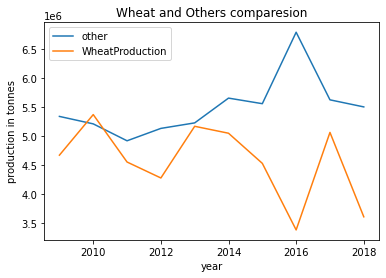

In [133]:
other = result.loc[result['Item'] !='Wheat',['Year','Value' ] ]
other = other.groupby('Year').sum()

year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot( year, other['Value'] , label = 'other') 
plt.plot( year, WheatProduction['Value'] , label = 'WheatProduction') 
plt.xlabel('year')
plt.ylabel('production in tonnes')
plt.title('Wheat and Others comparesion')
plt.legend()

# Analytics

**Is there a correlation between wheat production and other food production?**

In [148]:
#WheatProduction['WheatValue'] = WheatProduction['Value']    # to alter the colums' name
#WheatProduction = WheatProduction.drop('Value',axis=1)
WheatProduction



,Year,WheatValue
0,2015,4673040.0
0,2014,5370259.0
0,2016,4555110.0
0,2017,4280776.0
0,2013,5169235.0
0,2012,5050000.0
0,2010,4532000.0
0,2011,3388000.0
0,2009,5064000.0
0,2018,3613300.0


In [159]:
#other['otherValue'] = other['Value']   # to alter columns' name 
#other = other.drop('Value',axis = 1)   
other
final = pd.merge( left = WheatProduction,right = other , on='Year')
final =final.sort_values('Year')
final

,Year,WheatValue,otherValue
8,2009,5064000.0,5339037.0
6,2010,4532000.0,5210798.0
7,2011,3388000.0,4920038.0
5,2012,5050000.0,5133047.0
4,2013,5169235.0,5227763.0
1,2014,5370259.0,5653675.0
0,2015,4673040.0,5557918.0
2,2016,4555110.0,6785888.0
3,2017,4280776.0,5624014.0
9,2018,3613300.0,5502474.0


In [160]:
import statsmodels
import statsmodels.stats as stats
from statsmodels.stats import weightstats as weightstats
import statsmodels.api as sm
import statsmodels.formula.api as smf


results = smf.ols('WheatValue ~ otherValue', data = final).fit()
print(results.params)
results.summary()

Intercept     3.752933e+06
otherValue    1.486023e-01
dtype: float64


/Users/anthony/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             WheatValue   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.1084
Date:                Mon, 26 Oct 2020   Prob (F-statistic):              0.750
Time:                        12:11:33   Log-Likelihood:                -147.55
No. Observations:                  10   AIC:                             299.1
Df Residuals:                       8   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.753e+06   2.49e+06      1.507      0.170   -1.99e+06    9.49e+06
otherValue     0.1486      0.451      0.329      0.750      -0.892       1.189
==============================================================================
Omnibus:                        1.047   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.825
Skew:                          -0.510   Prob(JB):                        0.662
Kurtosis:                       2.031   Cond. No.                     6.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**It seems like the sample is NOT enough, but the 1.486023e-01 demonstrate that they are positively correlated**